<a href="https://colab.research.google.com/github/IsaqueFabro/Desafios-DNC/blob/main/Desafio%205%20Isaque%20Fabro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Lendo o dataset
dados = pd.read_csv("/content/Datacsv.csv", encoding= 'unicode_escape')
dados.head(10+1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 08:34,1.69,13047.0,United Kingdom


In [ ]:
# Verificando a descrição dos dados
dados.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Verificando os tipos de dados
dados.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
# Verificando valores nulos na coluna CustomerID
print("Valores nulos por coluna:")
print(dados.isnull().sum())

Valores nulos por coluna:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
Month          0
Recency        0
MesAno         0
dtype: int64


In [ ]:
# Removendo registros com CustomerID nulo
dados = dados.dropna(subset=['CustomerID'])

In [ ]:
# Removendo registros onde UnitPrice é menor ou igual a 0
dados = dados[dados['UnitPrice'] > 0]

In [ ]:
# Removendo registros onde Quantity é menor ou igual a 0
dados = dados[dados['Quantity'] > 0]

In [ ]:
# Convertendo CustomerID para inteiro
dados['CustomerID'] = dados['CustomerID'].astype(int)

In [ ]:
# Convertendo InvoiceDate para datetime
dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate'])

In [ ]:
# Removendo outliers onde Quantity > 10000 ou UnitPrice > 5000
dados = dados[(dados['Quantity'] <= 10000) & (dados['UnitPrice'] <= 5000)]

In [ ]:
# Criando a coluna TotalPrice
dados['TotalPrice'] = dados['Quantity'] * dados['UnitPrice']

In [ ]:
# Encontrando a última data de compra
ultima_data = dados['InvoiceDate'].max()
print(f'Última data de compra: {ultima_data}')

Última data de compra: 2011-12-09 12:50:00


In [ ]:
# Calculando a recência (R)
dados_rfm = dados.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ultima_data - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'mean'  # Monetary
}).reset_index()

In [ ]:
# Renomeando as colunas
dados_rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

In [ ]:
# Exibindo as primeiras linhas do RFM
print(dados_rfm.head())

   CustomerID  Recency  Frequency   Monetary
0       12347        1          7  23.681319
1       12348       74          4  57.975484
2       12349       18          1  24.076027
3       12350      309          1  19.670588
4       12352       35          8  29.482824


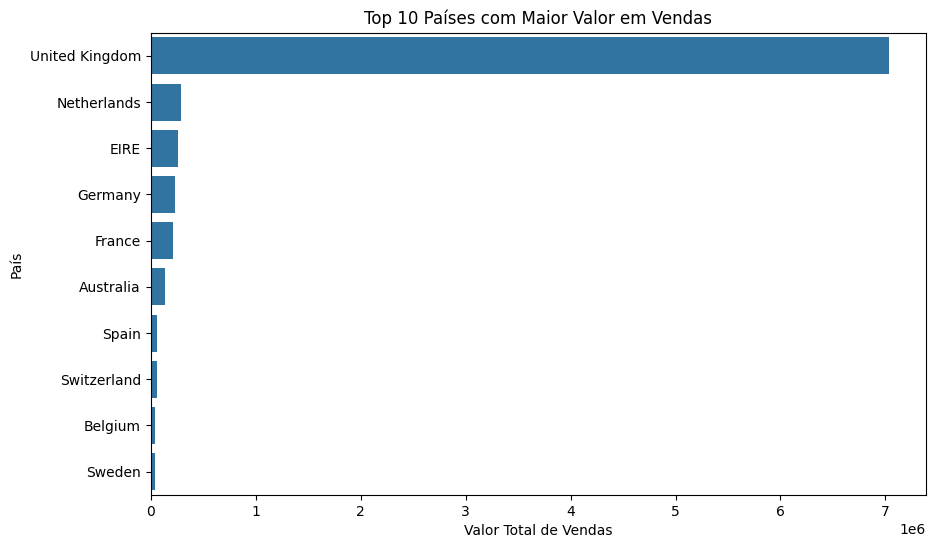

In [ ]:
# Top 10 países com maior valor em vendas
top_10_paises = dados.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_paises.values, y=top_10_paises.index)
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('Valor Total de Vendas')
plt.ylabel('País')
plt.show()

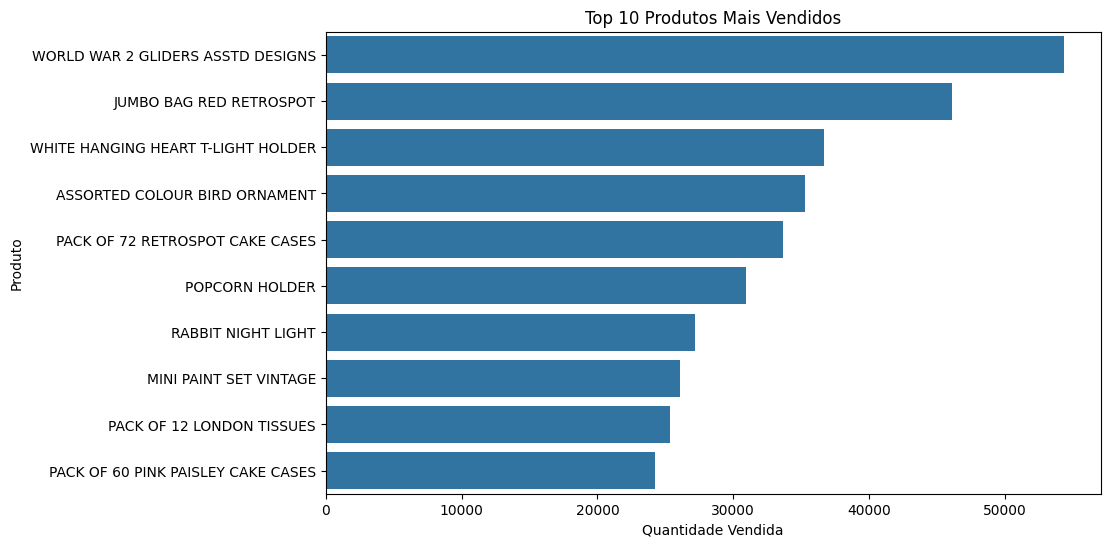

In [ ]:
# Top 10 produtos mais vendidos
top_10_produtos = dados.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_produtos.values, y=top_10_produtos.index)
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.show()


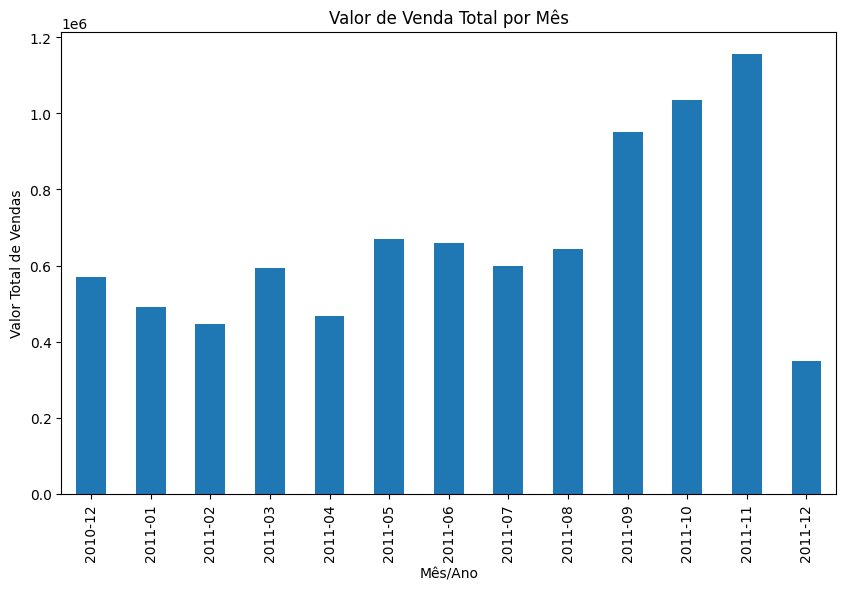

In [ ]:
# Valor de venda total por mês
dados['MesAno'] = dados['InvoiceDate'].dt.to_period('M')
vendas_por_mes = dados.groupby('MesAno')['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
vendas_por_mes.plot(kind='bar')
plt.title('Valor de Venda Total por Mês')
plt.xlabel('Mês/Ano')
plt.ylabel('Valor Total de Vendas')
plt.show()

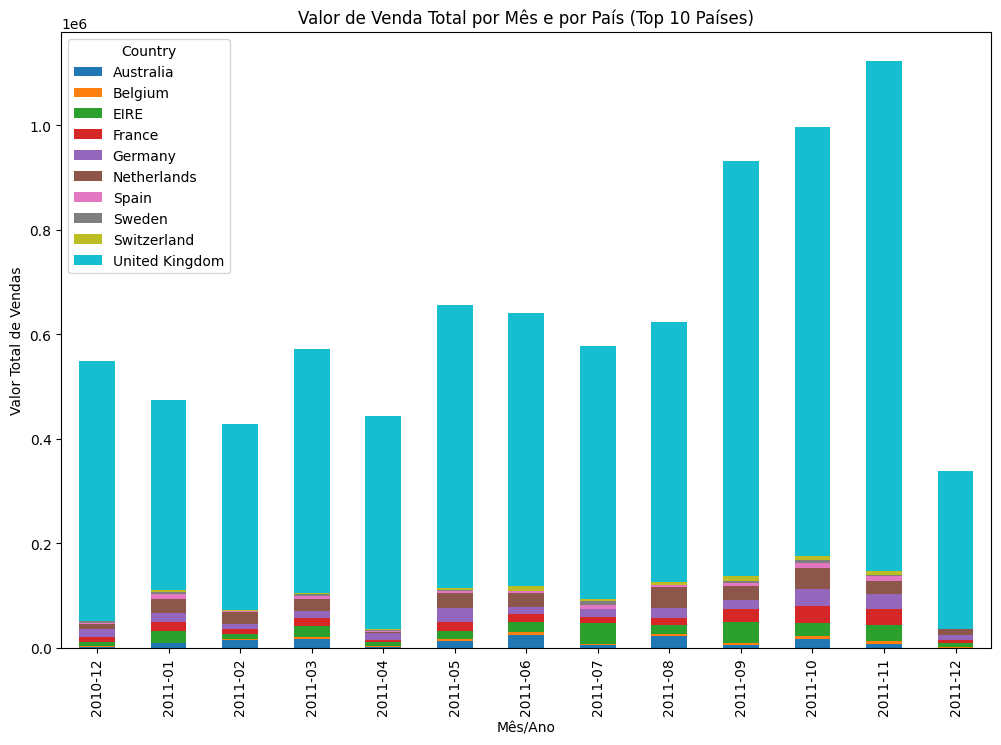

In [ ]:
# Valor de venda total por mês e por país (considere apenas os top 10 países)
dados_top_paises = dados[dados['Country'].isin(top_10_paises.index)]
vendas_por_mes_pais = dados_top_paises.groupby(['MesAno', 'Country'])['TotalPrice'].sum().unstack()
vendas_por_mes_pais.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Valor de Venda Total por Mês e por País (Top 10 Países)')
plt.xlabel('Mês/Ano')
plt.ylabel('Valor Total de Vendas')
plt.show()